In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)
#print("scipy.integrate version", scipy.integrate.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5099999999999998, 1.53, 1.55, 1.57, 1.59, 1.6099999999999999, 1.6300000000000001, 1.65, 1.67, 1.69, 1.71, 1.73, 1.75, 1.77, 1.79, 1.81, 1.83, 1.85, 1.87, 1.89, 1.9100000000000001, 1.93, 1.95, 1.97, 1.9900000000000002, 2.0100000000000002, 2.03, 2.05, 2.0700000000000003, 2.09, 2.1100000000000003, 2.13, 2.1500000000000004, 2.17, 2.19, 2.21, 2.23, 2.25, 2.27, 2.29, 2.3099999999999996, 2.33, 2.3499999999999996, 2.37, 2.39, 2.41, 2.43, 2.45, 2.4699999999999998, 2.49, 2.5100000000000002, 2.5300000000000002, 2.55, 2.57, 2.59, 2.61, 2.63, 2.65, 2.67, 2.69, 2.71, 2.73, 2.75, 2.7700000000000005, 2.79, 2.81, 2.83, 2.85, 2.87, 2.89, 2.91, 2.9299999999999997, 2.95, 2.97, 2.99, 3.01, 3.0300000000000002, 3.0500000000000003, 3.07, 3.09, 3.1100000000000003, 3.13, 3.1500000000000004, 3.17, 3.1900000000000004, 3.21, 3.2300000000000004, 3.25, 3.27, 3.29, 3.3099999999999996, 3.3300000000000005, 3.3499999999999996, 3.37, 3.39, 3.41, 3.43, 3.4499999999999997, 3.4699999999999998, 3.49, 3.51, 3.5300000000000002, 3.5500000000000003, 3.5700000000000003, 3.59, 3.61, 3.63, 3.6500000000000004, 3.67, 3.6899999999999995, 3.7100000000000004, 3.7299999999999995, 3.75, 3.77, 3.79, 3.8100000000000005, 3.8299999999999996, 3.8499999999999996, 3.87, 3.8899999999999997, 3.91, 3.93, 3.95, 3.9699999999999998, 3.9899999999999998, 4.01, 4.03, 4.05, 4.07, 4.09, 4.109999999999999, 4.13, 4.15, 4.17, 4.19, 4.21, 4.23, 4.25, 4.2700000000000005, 4.29, 4.31, 4.33, 4.35, 4.37, 4.390000000000001, 4.409999999999999, 4.43, 4.45, 4.47, 4.49, 4.51, 4.53, 4.550000000000001, 4.569999999999999, 4.59, 4.61, 4.63, 4.65, 4.67, 4.6899999999999995, 4.71, 4.7299999999999995, 4.75, 4.7700000000000005, 4.789999999999999, 4.8100000000000005, 4.83, 4.85, 4.87, 4.89, 4.91, 4.930000000000001, 4.95, 4.97, 4.99]

start = X[0] - (X[2] - X[1])/2
stop = X[-1] + (X[2] - X[1])/2
bins = len(X)

In [3]:
# eventsCuts: isCMUL == True
# tracksCuts: -4.0 < eta < -2.5; pt > 0.5; 2° < thetaAbs < 10°
# pairsCuts: -3.1 < rapidity < -2.8

Y_OS = [9093.0, 8840.0, 9090.0, 8888.0, 8586.0, 8587.0, 8491.0, 8515.0, 8222.0, 8068.0, 7841.0, 7802.0, 7738.0, 7429.0, 7435.0, 7154.0, 7042.0, 7152.0, 6932.0, 6872.0, 6683.0, 6217.0, 6204.0, 6138.0, 5916.0, 5983.0, 5672.0, 5583.0, 5382.0, 5151.0, 5113.0, 5159.0, 4961.0, 4836.0, 4793.0, 4532.0, 4486.0, 4395.0, 4313.0, 4056.0, 4012.0, 3880.0, 3862.0, 3759.0, 3660.0, 3545.0, 3422.0, 3366.0, 3258.0, 3249.0, 3173.0, 3141.0, 2986.0, 2948.0, 2880.0, 2778.0, 2739.0, 2708.0, 2561.0, 2596.0, 2443.0, 2513.0, 2415.0, 2472.0, 2401.0, 2395.0, 2363.0, 2418.0, 2444.0, 2554.0, 2752.0, 2885.0, 3139.0, 3418.0, 4076.0, 4806.0, 5751.0, 6687.0, 7545.0, 8258.0, 8247.0, 7806.0, 6624.0, 5363.0, 4025.0, 2909.0, 2252.0, 1790.0, 1387.0, 1260.0, 1161.0, 1069.0, 1029.0, 986.0, 1002.0, 938.0, 913.0, 872.0, 881.0, 870.0, 769.0, 865.0, 791.0, 842.0, 838.0, 786.0, 771.0, 846.0, 848.0, 757.0, 808.0, 774.0, 710.0, 711.0, 648.0, 567.0, 588.0, 574.0, 527.0, 521.0, 511.0, 501.0, 519.0, 507.0, 497.0, 460.0, 447.0, 418.0, 445.0, 441.0, 412.0, 420.0, 411.0, 431.0, 399.0, 339.0, 378.0, 368.0, 391.0, 354.0, 303.0, 313.0, 365.0, 335.0, 338.0, 329.0, 304.0, 324.0, 315.0, 301.0, 296.0, 242.0, 306.0, 268.0, 270.0, 252.0, 276.0, 295.0, 252.0, 254.0, 258.0, 242.0, 248.0, 240.0, 235.0, 215.0, 218.0, 243.0, 256.0, 202.0, 228.0, 222.0, 218.0, 206.0, 186.0]

vMass_OS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_OS.fill(X, weight = Y_OS)

Y_LS = [1777.0, 1833.0, 1672.0, 1661.0, 1668.0, 1633.0, 1590.0, 1564.0, 1549.0, 1530.0, 1490.0, 1483.0, 1472.0, 1381.0, 1370.0, 1256.0, 1252.0, 1281.0, 1244.0, 1216.0, 1240.0, 1111.0, 1150.0, 1081.0, 1117.0, 1096.0, 971.0, 1011.0, 967.0, 985.0, 940.0, 905.0, 921.0, 879.0, 837.0, 859.0, 880.0, 819.0, 827.0, 788.0, 791.0, 765.0, 718.0, 675.0, 668.0, 667.0, 686.0, 664.0, 617.0, 635.0, 623.0, 564.0, 600.0, 572.0, 556.0, 567.0, 511.0, 530.0, 514.0, 576.0, 535.0, 495.0, 484.0, 515.0, 460.0, 437.0, 446.0, 500.0, 471.0, 424.0, 403.0, 382.0, 434.0, 408.0, 360.0, 384.0, 368.0, 370.0, 367.0, 387.0, 370.0, 336.0, 367.0, 357.0, 320.0, 338.0, 311.0, 313.0, 284.0, 332.0, 305.0, 304.0, 314.0, 269.0, 291.0, 286.0, 298.0, 266.0, 255.0, 255.0, 247.0, 256.0, 265.0, 248.0, 220.0, 258.0, 260.0, 216.0, 220.0, 228.0, 239.0, 230.0, 213.0, 212.0, 206.0, 197.0, 215.0, 188.0, 218.0, 202.0, 211.0, 173.0, 179.0, 199.0, 176.0, 175.0, 164.0, 174.0, 165.0, 166.0, 161.0, 171.0, 181.0, 152.0, 147.0, 140.0, 141.0, 128.0, 142.0, 150.0, 133.0, 123.0, 115.0, 144.0, 122.0, 130.0, 126.0, 149.0, 138.0, 107.0, 109.0, 125.0, 92.0, 141.0, 121.0, 124.0, 134.0, 115.0, 136.0, 110.0, 94.0, 75.0, 107.0, 97.0, 108.0, 102.0, 106.0, 97.0, 96.0, 89.0, 98.0, 92.0, 86.0, 101.0, 89.0]

vMass_LS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_LS.fill(X, weight = Y_LS)

Y_JPsi = [13.0, 10.0, 15.0, 14.0, 14.0, 21.0, 16.0, 19.0, 23.0, 22.0, 28.0, 19.0, 35.0, 30.0, 32.0, 32.0, 29.0, 31.0, 40.0, 40.0, 36.0, 38.0, 57.0, 56.0, 58.0, 72.0, 80.0, 67.0, 64.0, 88.0, 100.0, 88.0, 101.0, 103.0, 109.0, 110.0, 142.0, 141.0, 137.0, 136.0, 145.0, 161.0, 168.0, 164.0, 169.0, 192.0, 196.0, 212.0, 246.0, 257.0, 266.0, 273.0, 308.0, 291.0, 328.0, 320.0, 371.0, 443.0, 438.0, 491.0, 558.0, 657.0, 777.0, 865.0, 956.0, 1174.0, 1356.0, 1592.0, 1848.0, 2228.0, 2787.0, 3369.0, 4312.0, 5308.0, 6861.0, 8792.0, 11625.0, 15016.0, 18763.0, 21540.0, 23053.0, 21469.0, 17788.0, 12690.0, 7920.0, 4402.0, 2250.0, 1076.0, 542.0, 305.0, 171.0, 131.0, 76.0, 44.0, 43.0, 31.0, 22.0, 14.0, 13.0, 12.0, 9.0, 11.0, 6.0, 10.0, 7.0, 4.0, 3.0, 1.0, 3.0, 6.0, 5.0, 3.0, 1.0, 3.0, 2.0, 2.0, 1.0, 0.0, 1.0, 1.0, 1.0, 2.0, 3.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0]

vMass_JPsi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_JPsi.fill(X, weight = Y_JPsi)

Y_Psi = [7.0, 3.0, 5.0, 6.0, 4.0, 2.0, 4.0, 3.0, 5.0, 5.0, 5.0, 0.0, 9.0, 6.0, 4.0, 4.0, 6.0, 4.0, 6.0, 10.0, 8.0, 11.0, 7.0, 11.0, 14.0, 5.0, 12.0, 9.0, 7.0, 23.0, 14.0, 18.0, 21.0, 14.0, 22.0, 18.0, 12.0, 14.0, 24.0, 17.0, 27.0, 22.0, 28.0, 27.0, 28.0, 22.0, 31.0, 46.0, 32.0, 20.0, 52.0, 39.0, 41.0, 40.0, 34.0, 40.0, 48.0, 53.0, 54.0, 68.0, 67.0, 64.0, 74.0, 83.0, 68.0, 63.0, 89.0, 72.0, 115.0, 98.0, 94.0, 108.0, 113.0, 113.0, 121.0, 125.0, 114.0, 136.0, 140.0, 125.0, 149.0, 187.0, 195.0, 194.0, 205.0, 245.0, 273.0, 273.0, 340.0, 365.0, 414.0, 449.0, 481.0, 634.0, 646.0, 760.0, 867.0, 1051.0, 1136.0, 1377.0, 1674.0, 2017.0, 2451.0, 3105.0, 4009.0, 5075.0, 6535.0, 8198.0, 9792.0, 11038.0, 11177.0, 10320.0, 8233.0, 5864.0, 3684.0, 2014.0, 1019.0, 471.0, 272.0, 136.0, 81.0, 54.0, 30.0, 16.0, 13.0, 19.0, 6.0, 18.0, 8.0, 3.0, 5.0, 6.0, 1.0, 7.0, 4.0, 2.0, 2.0, 3.0, 1.0, 2.0, 4.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 3.0, 1.0, 0.0, 1.0, 2.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

vMass_Psi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_Psi.fill(X, weight = Y_Psi)

Y_MC = [20.0, 13.0, 20.0, 20.0, 18.0, 23.0, 20.0, 22.0, 28.0, 27.0, 33.0, 19.0, 44.0, 36.0, 36.0, 36.0, 35.0, 35.0, 46.0, 50.0, 44.0, 49.0, 64.0, 67.0, 72.0, 77.0, 92.0, 76.0, 71.0, 111.0, 114.0, 106.0, 122.0, 117.0, 131.0, 128.0, 154.0, 155.0, 161.0, 153.0, 172.0, 183.0, 196.0, 191.0, 197.0, 214.0, 227.0, 258.0, 278.0, 277.0, 318.0, 312.0, 349.0, 331.0, 362.0, 360.0, 419.0, 496.0, 492.0, 559.0, 625.0, 721.0, 851.0, 948.0, 1024.0, 1237.0, 1445.0, 1664.0, 1963.0, 2326.0, 2881.0, 3477.0, 4425.0, 5421.0, 6982.0, 8917.0, 11739.0, 15152.0, 18903.0, 21665.0, 23202.0, 21656.0, 17983.0, 12884.0, 8125.0, 4647.0, 2523.0, 1349.0, 882.0, 670.0, 585.0, 580.0, 557.0, 678.0, 689.0, 791.0, 889.0, 1065.0, 1149.0, 1389.0, 1683.0, 2028.0, 2457.0, 3115.0, 4016.0, 5079.0, 6538.0, 8199.0, 9795.0, 11044.0, 11182.0, 10323.0, 8234.0, 5867.0, 3686.0, 2016.0, 1020.0, 471.0, 273.0, 137.0, 82.0, 56.0, 33.0, 18.0, 14.0, 21.0, 7.0, 19.0, 9.0, 4.0, 5.0, 6.0, 2.0, 7.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 3.0, 4.0, 1.0, 1.0, 1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 3.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0]

vMass_MC = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_MC.fill(X, weight = Y_MC)

Hist(Regular(175, 1.5, 5, name='$m_{\\mu \\mu}$', label='X'), storage=Double()) # Sum: 320997.0

In [4]:
def CB2(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def NA60(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    return np.piecewise(x, 
                        [(x - mu)/sig < alphaL, 
                         ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                         (x - mu)/sig > alphaR],
                        [lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1L * (alphaL - (x - mu)/sig)**(p2L - p3L * np.sqrt(alphaL - (x - mu)/sig)))**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1R * ((x - mu)/sig - alphaR)**(p2R - p3R * np.sqrt((x - mu)/sig - alphaR)))**2)])

def VWG(x, N, mu, alpha, beta):
    sigma = alpha + beta*((x-mu)/mu)
    return N * np.exp(-(x - mu)**2 / (2*sigma**2))

def PR(x, N, a1, b1, b2):
    return N * (1 + a1*x) / (b1*x + b2*x)

def DE(x, N, alpha, beta1, beta2):
    return N * (np.exp(beta1*x) + alpha * np.exp(beta2*x))

def test(x, y1, y2, y3, y4, y5):
    x0 = [1.5, 2.5, 3.45, 3.8, 5]
    return interp1d([*x0], [y1, y2, y3, y4, y5], kind = 'cubic', bounds_error = False, fill_value = "extrapolate")(x)

def test2(x, y1, y2, y3, y4, y5):
    return np.exp(test(x, y1, y2, y3, y4, y5))

In [5]:
def fixedFunc_JPsi(x, N1, mu1, sig1):
    return func_JPsi(x, N1, mu1, sig1, alphaL1, nL1, alphaR1, nR1)

def fixedFunc_Psi(x, N2, mu2, sig2):
    return func_Psi(x, N2, mu2, sig2, alphaL2, nL2, alphaR2, nR2)

def fixedFunc_MC(x, N1, mu1, sig1, N2, mu2, sig2):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2)

def fixedFunc_bckg(x, y1, y2, y3, y4, y5):
    return func_bckg(x, y1, y2, y3, y4, y5)

def fixedFitFunc(x,
                 N1, mu1, sig1,
                 N2, mu2, sig2,
                y1, y2, y3, y4, y5):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2) + fixedFunc_bckg(x, y1, y2, y3, y4, y5)

condition_x_range = lambda x_data: (x_data < 5.0)
func_JPsi = CB2
func_Psi = CB2
func_bckg = test2
func_MC = fixedFunc_MC
func = fixedFitFunc

In [6]:
x_data = np.array(X)
y_data = np.array(vMass_JPsi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

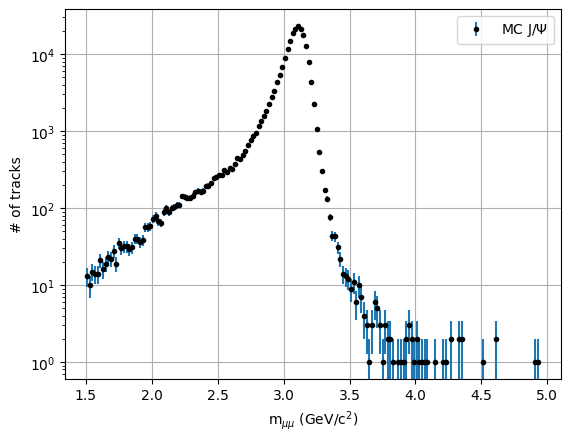

In [7]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [8]:
p0_JPsi = np.array([136241.85680339273, 3.1003675365856544, 0.0630318569252801, 0.993869592186634, 3.0340276033125493, 2.233482641523906, 2.705629560440874])

In [9]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_JPsi, pcov_JPsi, nfev_JPsi, fvec_JPsi, fjac_JPsi = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_JPsi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_JPsi))
print("pcov: \n", pcov_JPsi)
print("residual: \n", nfev_JPsi)

popt: 
 [23180.97510964608, 3.1044211701090454, 0.058722043705330115, 0.951181736542864, 3.008674471738986, 2.4324901175875544, 3.2862164541685974]
pcov: 
 [[ 2.35705017e+04  1.80730860e-02 -3.74025014e-02 -1.31889183e-01
  -3.52136745e-01 -1.70761395e+00  5.55677477e+00]
 [ 1.80730860e-02  2.24621588e-07 -1.18186671e-07 -4.02933886e-06
   1.11506511e-05 -2.83816699e-06  5.06076727e-06]
 [-3.74025014e-02 -1.18186671e-07  1.64284473e-07  3.31614748e-06
  -6.74815113e-06  9.13900708e-06 -2.78612897e-05]
 [-1.31889183e-01 -4.02933886e-06  3.31614748e-06  2.01422435e-04
  -7.85809008e-04  1.62305155e-04 -4.48088295e-04]
 [-3.52136745e-01  1.11506511e-05 -6.74815113e-06 -7.85809008e-04
   4.43920459e-03 -2.69527520e-04  6.46987987e-04]
 [-1.70761395e+00 -2.83816699e-06  9.13900708e-06  1.62305155e-04
  -2.69527520e-04  4.68262703e-03 -2.27332598e-02]
 [ 5.55677477e+00  5.06076727e-06 -2.78612897e-05 -4.48088295e-04
   6.46987987e-04 -2.27332598e-02  1.47952454e-01]]
residual: 
 {'nfev': 9, 

fit error : 153.52738844794894


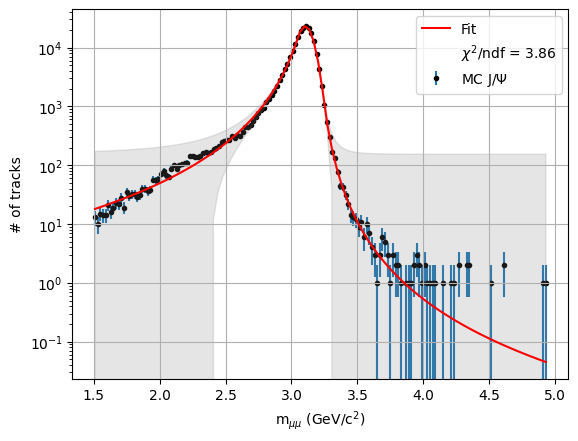

In [10]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_JPsi(x_fit, *popt_JPsi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_JPsi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_JPsi(x_data, *popt_JPsi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_JPsi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

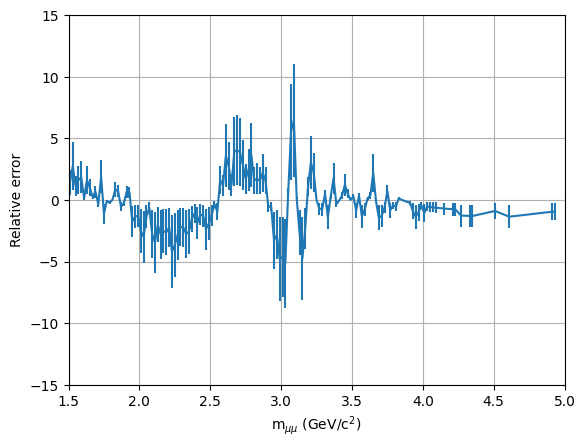

In [11]:
err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_JPsi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [12]:
x_data = np.array(X)
y_data = np.array(vMass_Psi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

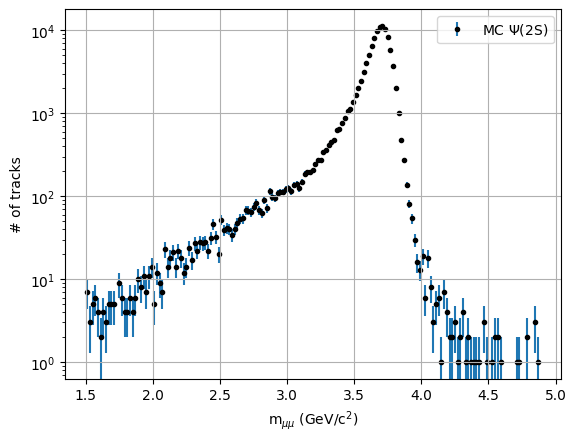

In [13]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [14]:
p0_Psi = np.array([67449.51297432544, 3.693248662583962, 0.06511527893660865, 0.9607870324016564, 2.849198115287005, 2.283717751711943, 2.5497581009488974])

In [15]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_Psi, pcov_Psi, nfev_Psi, fvec_Psi, fjac_Psi = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_Psi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_Psi))
print("pcov: \n", pcov_Psi)
print("residual: \n", nfev_Psi)

popt: 
 [11479.84024249191, 3.698835288354469, 0.06035508342069381, 0.8868008591822978, 2.9618557555140805, 2.501490469894009, 3.2978969382319074]
pcov: 
 [[ 6.76964150e+03  1.15707554e-02 -2.19487260e-02 -4.31323979e-02
  -2.78046726e-01 -9.41909021e-01  3.19673944e+00]
 [ 1.15707554e-02  3.23357513e-07 -1.73838040e-07 -5.02365955e-06
   1.24949157e-05 -4.56602823e-06  9.57490666e-06]
 [-2.19487260e-02 -1.73838040e-07  2.14058758e-07  3.88554216e-06
  -7.13605330e-06  1.10415873e-05 -3.46516706e-05]
 [-4.31323979e-02 -5.02365955e-06  3.88554216e-06  1.93883392e-04
  -6.82685265e-04  1.78381826e-04 -5.05812340e-04]
 [-2.78046726e-01  1.24949157e-05 -7.13605330e-06 -6.82685265e-04
   3.62344259e-03 -2.68083375e-04  6.52426716e-04]
 [-9.41909021e-01 -4.56602823e-06  1.10415873e-05  1.78381826e-04
  -2.68083375e-04  7.33781538e-03 -3.95447615e-02]
 [ 3.19673944e+00  9.57490666e-06 -3.46516706e-05 -5.05812340e-04
   6.52426716e-04 -3.95447615e-02  2.76176621e-01]]
residual: 
 {'nfev': 11, 

fit error : 82.27957723142204


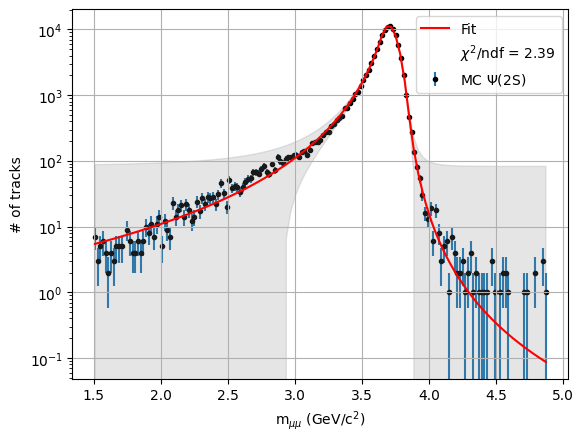

In [16]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_Psi(x_fit, *popt_Psi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_Psi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_Psi(x_data, *popt_Psi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_Psi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

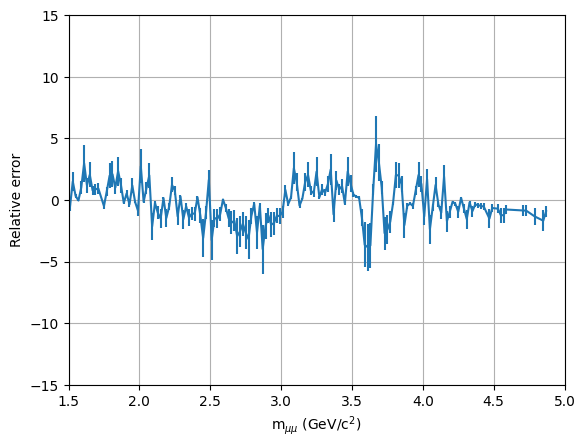

In [17]:
err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_Psi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [18]:
x_data = np.array(X)
y_data = np.array(vMass_MC)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

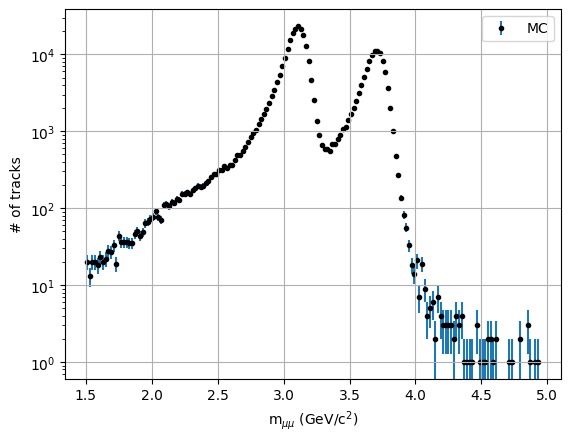

In [19]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [20]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1= popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

p0_MC = np.array([N1, mu1, sig1, N2, mu2, sig2])

In [21]:
def mklb(p0, var):
    return p0*(1-np.sign(p0)*var)

def mkub(p0, var):
    return p0*(1+np.sign(p0)*var)

varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0_MC[:3],varpks), *mklb(p0_MC[3:6],varpks)])
ub = np.array([*mkub(p0_MC[:3],varpks), *mkub(p0_MC[3:6],varpks)])
bounds = (lb,ub)

In [22]:
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, method = 'trf', full_output = True)
popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_MC))
print("pcov: \n", pcov_MC)
print("residual: \n", nfev_MC)

popt: 
 [23165.39001734665, 3.1042031587941814, 0.058838191949552664, 11483.641897549593, 3.69885842409336, 0.06032911831586411]
pcov: 
 [[ 2.34963262e+04  1.31237441e-02 -3.22290482e-02 -8.58971774e+01
  -1.14862455e-03  1.38507950e-03]
 [ 1.31237441e-02  1.35291475e-07 -3.29597110e-08 -9.34670926e-06
   1.11235104e-09 -7.09582097e-10]
 [-3.22290482e-02 -3.29597110e-08  8.58804422e-08  7.79602190e-04
   8.58050880e-09 -1.11618889e-08]
 [-8.58971774e+01 -9.34670926e-06  7.79602190e-04  1.09495200e+04
   1.59545394e-02 -3.16099738e-02]
 [-1.14862455e-03  1.11235104e-09  8.58050880e-09  1.59545394e-02
   2.97547412e-07 -9.53514156e-08]
 [ 1.38507950e-03 -7.09582097e-10 -1.11618889e-08 -3.16099738e-02
  -9.53514156e-08  1.81775639e-07]]
residual: 
 {'nfev': 5, 'fvec': array([ 0.8113015 ,  3.16681672,  1.17262861,  1.36589633,  2.12446722,
        1.03448655,  2.00233359,  1.70488482,  0.58395147,  1.00806366,
        0.0773505 ,  3.60472817, -1.19895292,  0.24199457,  0.48869926,
        

fit error : 185.59592181393307


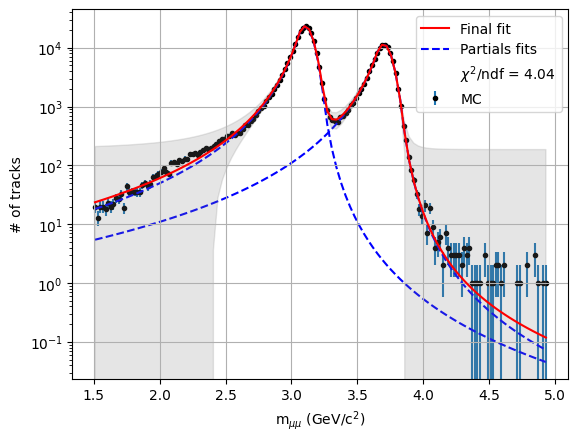

In [23]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_MC(x_fit, *popt_MC)
plt.plot(x_fit, y_fit, '-r', label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt_MC[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt_MC[3:6]), '--b', zorder = 1)

sigmas = np.diag(pcov_MC)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_MC(x_data, *popt_MC)) / y_error) ** 2)
ndf = len(x_data) + len(popt_MC) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_15224/4254452161.py:1: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))


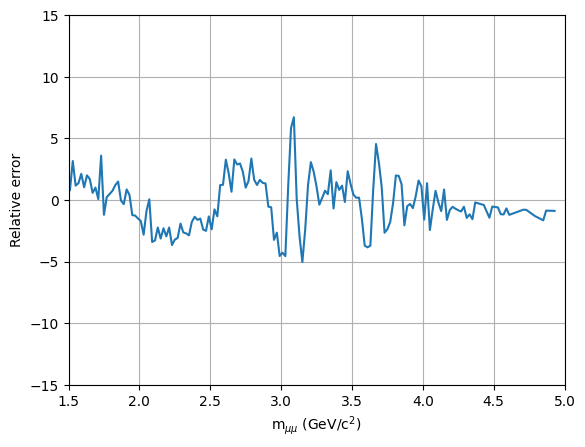

In [24]:
err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_MC["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [25]:
x_data = np.array(X)
y_data = np.array(vMass_LS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

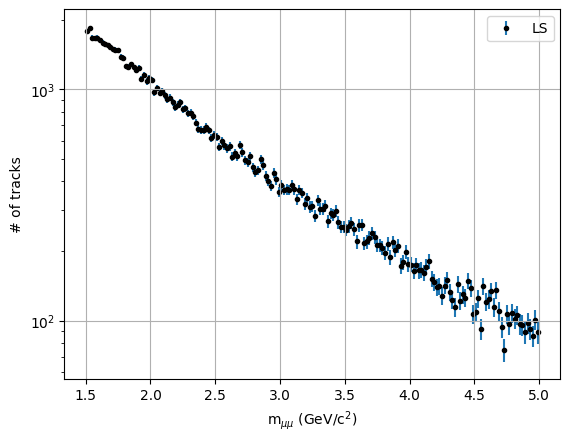

In [26]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [27]:
p0_bckg = np.array([1,1,1,1,1])

In [28]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_bckg, pcov_bckg, nfev_bckg, fvec_bckg, fjac_bckg = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_bckg, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_bckg))
print("pcov: \n", pcov_bckg)
print("residual: \n", nfev_bckg)

popt: 
 [7.527832215825048, 6.44690719084086, 5.588212589815029, 5.318387245569625, 4.4506848511639285]
pcov: 
 [[ 1.02810740e-04 -2.00682556e-05  2.50093560e-05  8.39445508e-06
   4.97093103e-05]
 [-2.00682556e-05  3.29609159e-05  1.00595165e-05 -1.83973443e-06
   1.75387117e-05]
 [ 2.50093560e-05  1.00595165e-05  7.78206869e-05  6.15570186e-05
  -1.94695178e-06]
 [ 8.39445508e-06 -1.83973443e-06  6.15570186e-05  9.79409833e-05
  -1.44121886e-04]
 [ 4.97093103e-05  1.75387117e-05 -1.94695178e-06 -1.44121886e-04
   1.53857459e-03]]
residual: 
 {'nfev': 18, 'fvec': array([ 1.43945335e+00, -8.71044090e-01,  2.02478197e+00,  1.32275480e+00,
        1.96558201e-01,  1.26746290e-01,  2.80029455e-01,  2.87068028e-02,
       -4.82631721e-01, -8.75587673e-01, -7.16284362e-01, -1.38193711e+00,
       -1.92818355e+00, -3.75384276e-01, -8.95747724e-01,  1.44998192e+00,
        7.53377948e-01, -8.48384720e-01, -5.86795567e-01, -5.55086894e-01,
       -1.96975504e+00,  1.02813234e+00, -8.69268974e-

fit error : 0.043012880869696526


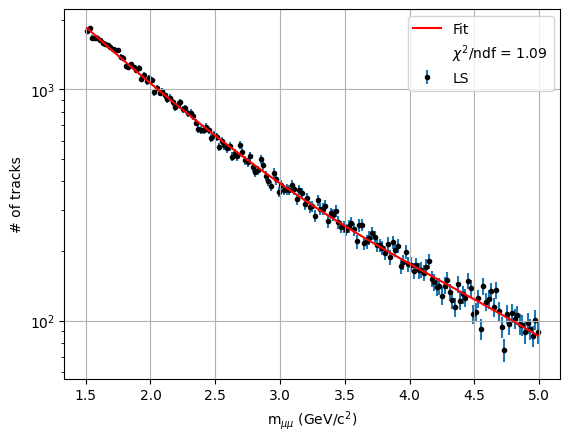

In [29]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_bckg(x_fit, *popt_bckg)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_bckg)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_bckg(x_data, *popt_bckg)) / y_error) ** 2)
ndf = len(x_data) + len(popt_bckg) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

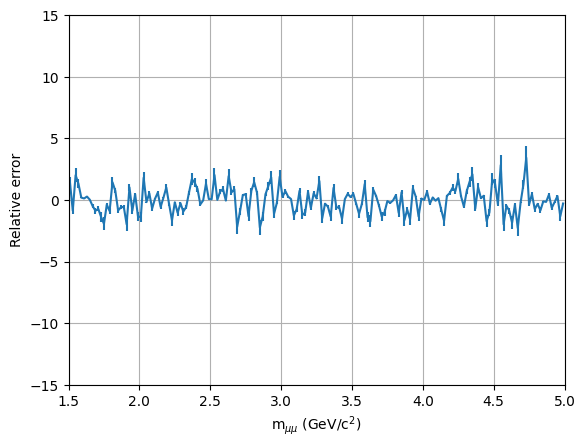

In [30]:
err = np.sqrt(nfev_bckg["fvec"]**2/(nfev_bckg["nfev"]-len(popt_bckg)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_bckg["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [31]:
x_data = np.array(X)
y_data = np.array(vMass_OS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

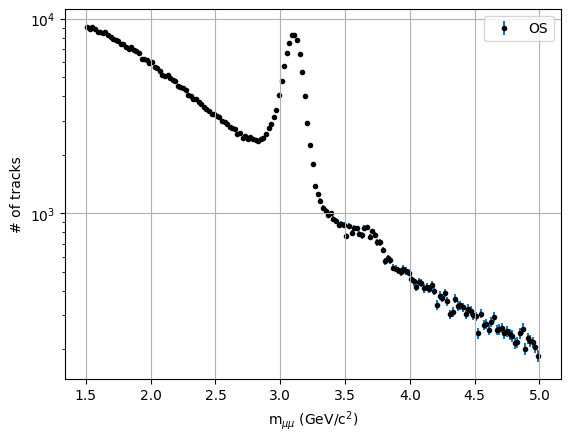

In [32]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [33]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1 = popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

y1 = popt_bckg[0]
y2 = popt_bckg[1]
y3 = popt_bckg[2]
y4 = popt_bckg[3]
y5 = popt_bckg[4]

p0 = np.array([N1, mu1, sig1, N2, mu2, sig2,  y1, y2, y3, y4, y5])

In [34]:
varbg = np.ones(np.shape(p0[6:]))*1# bg parameters variation factor around p0
varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0[:3],varpks), *mklb(p0[3:6],varpks), *mklb(p0[6:],varbg)])
ub = np.array([*mkub(p0[:3],varpks), *mkub(p0[3:6],varpks), *mkub(p0[6:],varbg)])
bounds = (lb,ub)

In [35]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, method = 'trf', full_output = True)
popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt))
print("pcov: \n", pcov)
print("residual: \n", nfev)

popt: 
 [7169.440103080801, 3.1019002157026354, 0.06459424807586199, 181.04079932738057, 3.688744642859105, 0.06639059174759357, 9.138867041386249, 8.037604281922555, 6.739560386715988, 6.349876369089736, 5.2760949932188765]
pcov: 
 [[ 3.77047984e+03  6.28846299e-03 -2.12747225e-02  1.21463195e+01
  -8.65759198e-03  1.69919093e-02 -1.14921031e-02 -6.02577173e-03
  -3.71119106e-02 -2.42302743e-02 -1.56785289e-02]
 [ 6.28846299e-03  3.47497276e-07 -1.33627197e-07 -2.55454664e-04
   2.23181898e-07 -4.10531878e-07  1.18253019e-07  4.94470172e-07
   1.02204471e-06  5.12620186e-07  8.03853081e-07]
 [-2.12747225e-02 -1.33627197e-07  3.83536289e-07  1.11608787e-03
  -4.56466452e-07  9.26566297e-07 -5.30536998e-07 -1.12572102e-06
  -3.01408364e-06 -1.83975449e-06 -1.42476836e-06]
 [ 1.21463195e+01 -2.55454664e-04  1.11608787e-03  4.24386403e+02
   1.97628016e-02 -9.87691462e-02 -7.70510839e-03 -7.19669710e-03
  -4.31449159e-02 -4.52170205e-02  3.85254011e-02]
 [-8.65759198e-03  2.23181898e-07 -

fit error : 64.767799396049


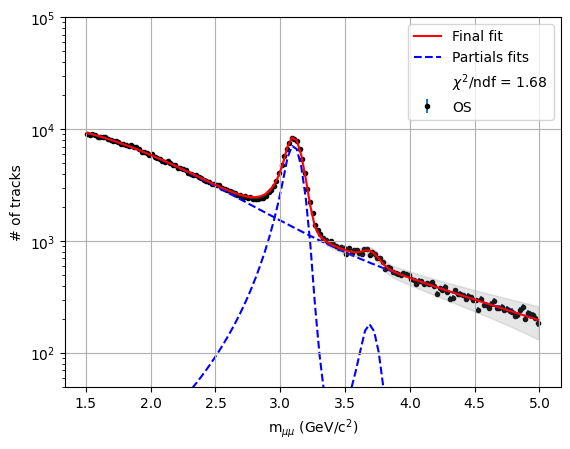

In [36]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func(x_fit, *popt)
plt.plot(x_fit, y_fit, '-r', zorder = 2, label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt[3:6]), '--b', zorder = 1)
plt.plot(x_fit, fixedFunc_bckg(x_fit, *popt[6:]), '--b', zorder = 1)

sigmas = np.absolute(np.diag(pcov))
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func(x_data, *popt)) / y_error) ** 2)
ndf = len(x_data) + len(popt) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.legend()
plt.yscale('log')
plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.ylim(50, 100000)
plt.grid(True)

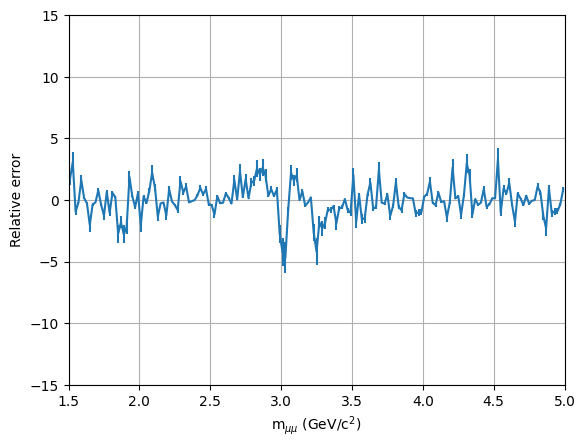

In [37]:
err = np.sqrt(nfev["fvec"]**2/(nfev["nfev"]-len(popt)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [38]:
def dCB2(pcov, x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )
    
    def dCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(-2*mu + 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: -AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def dCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL/(BL - (-mu + x)/sig)**nL, 
                             lambda x: np.exp(-(-mu + x)**2/(2*sig**2)), 
                             lambda x: AR/(BR + (-mu + x)/sig)**nR])

    def dCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(2*mu - 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])

    def dCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL*(-mu + x)/(sig**2*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: N*(-mu + x)**2*np.exp(-(-mu + x)**2/(2*sig**2))/sig**3, 
                             lambda x: AR*N*nR*(-mu + x)/(sig**2*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def IdCB2dx(x, *args):
        return quad(dCB2dx, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dN(x, *args):
        return quad(dCB2dN, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dmu(x, *args):
        return quad(dCB2dmu, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dsig(x, *args):
        return quad(dCB2dsig, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    return np.sqrt(IdCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * (((stop - start)/bins)/2)**2 \
                   + IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[0, 0] \
                   + IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[1, 1] \
                   + IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[2, 2] \
                   + 2 * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[0, 1])) \
                   + 2 * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[1, 2])) \
                   + 2 * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[2, 1])))

N_JPsi = quad(fixedFunc_JPsi, start, stop, args = (*popt[:3], ))[0] / ((stop - start)/bins)
err_JPsi = dCB2(pcov[:3, :3], x_data, *popt[:3], *popt_JPsi[3:])
print(r"N_JPsi = ", N_JPsi, " +/- ", err_JPsi, "(stat.)")

N_JPsi =  71287.2966355328  +/-  1062.022486891547 (stat.)
